In [21]:
import os
import pathlib
import sys

sys.path.append(str(pathlib.Path(os.getcwd()).parent.absolute()))

path = "plots"
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
import numpy as np

mpl.rcParams["text.usetex"] = True
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "Computer Modern Roman"
mpl.rcParams["font.sans-serif"] = "Computer Modern Sans Serif"
mpl.rcParams["font.monospace"] = "Computer Modern Typewriter"

In [23]:
from aimy_target_shooting import (
    export_tools,
    transform,
)

In [24]:
import seaborn as sns

text_color = "#222222"
sns.set(
    font="Arial",
    rc={
        "axes.axisbelow": True,
        "axes.edgecolor": "grey",
        "axes.facecolor": "whitesmoke",
        "axes.grid": False,
        "axes.labelcolor": text_color,
        "axes.spines.right": True,
        "axes.spines.top": True,
        "axes.titlecolor": "black",
        "grid.color": "white",
        "figure.constrained_layout.use": True,
        "figure.facecolor": "None",
        "figure.titlesize": 16,
        "figure.titleweight": "bold",
        "lines.solid_capstyle": "round",
        "patch.edgecolor": "w",
        "patch.force_edgecolor": True,
        "text.color": text_color,
        "xtick.bottom": True,
        "xtick.color": text_color,
        "xtick.direction": "out",
        "xtick.top": False,
        "ytick.color": text_color,
        # "ytick.direction": "out",
        "ytick.left": True,
        "ytick.right": False,
        "savefig.dpi": 300,
    },
)

sns.set_context(
    "paper",
    rc={"font.size": 12, "axes.titlesize": 14, "axes.labelsize": 12},
)

In [25]:
def add_table_2d(ax: plt.axes, shift: float = 0.0):
    table = plt.Rectangle(
        (0 + shift, -1.525 / 2),
        2.74,
        1.525,
        facecolor="dimgray",
        alpha=0.45,
        zorder=1,
        label="_nolegend_",
    )

    table_frame = plt.Rectangle(
        (0 + shift, -1.525 / 2),
        2.74,
        1.525,
        linewidth=8,
        facecolor="none",
        edgecolor="white",
        zorder=1,
        label="_nolegend_",
    )

    ax.add_patch(table)
    ax.add_patch(table_frame)

    ax.hlines(0.0, 0.0 + shift, 2.74 + shift, linewidth=3, color="white", zorder=1)
    ax.vlines(
        2.74 / 2 + shift,
        -1.525 / 2,
        1.525 / 2,
        linewidth=6,
        color="dimgrey",
        zorder=1,
        label="_nolegend_",
    )

In [26]:
dir = pathlib.Path("/home/adittrich/nextcloud/80_Data/230113_target_shooting")

filename_1 = "20230113195712_3_to_3.hdf5"  # 3 to positions
filename_2 = "20230113185808_positions.hdf5"  # 5 to positions
filename_3 = "20230113190434_lookuptable_adjusted.hdf5"  # LUT
filename_4 = "20230113183704_w_angles_beta_07.hdf5"  # 5 to positions, angles of impact

filenames = [filename_1, filename_2, filename_3, filename_4]

collections = []
for filename in filenames:
    collection = export_tools.import_all_from_hdf5(file_path=dir / filename)
    collections.append(collection)

In [27]:
collection_hitpoints = []

for collection in collections:
    collection = transform.change_time_stamps(collection)
    collection = transform.move_origin(
        collection, reference_position=[0.20, 3.47, -1.2]
    )
    collection = transform.rotate_coordinate_system(collection)

    hitpoints = []

    for trajectory in collection:
        positions = np.array(trajectory.positions)
        indices = np.argwhere(positions[:, 2] < 0.79)

        if indices.size > 0:
            i = indices[0][0]
            hitpoints.append(positions[i])

    collection_hitpoints.append(hitpoints)

In [28]:
width_space = np.linspace(-0.70, 0.70, 5)
depth_space = np.linspace(1.77, 2.67, 4)

targets = []
for depth in np.nditer(depth_space):
    for width in np.nditer(width_space):
        target = np.array([depth, width, 0.76])
        targets.append(target)

targets = np.array(targets)

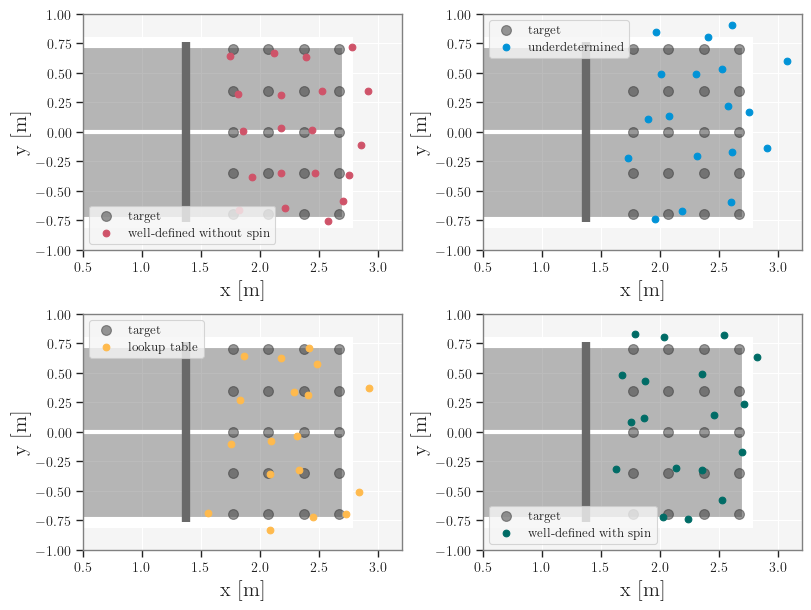

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6), layout="constrained")
labels = [
    "well-defined without spin",
    "underdetermined",
    "lookup table",
    "well-defined with spin",
]
colors = ["#CF5369", "#0193d7", "#ffba4d", "#006c66", "#46b361", "#17c7d0", "#777777"]

index = 0
for i in range(2):
    for j in range(2):
        add_table_2d(axs[i, j])
        hitpoints_1 = np.array(collection_hitpoints[index])
        axs[i, j].scatter(
            targets[:, 0],
            targets[:, 1],
            color="#333333",
            alpha=0.5,
            s=50,
            label="target",
            edgecolors=None,
        )
        axs[i, j].scatter(
            hitpoints_1[:, 0],
            hitpoints_1[:, 1],
            color=colors[index],
            label=labels[index],
        )

        index += 1

for ax in axs:
    for a in ax:
        a.set_xlim((0.5, 3.2))
        a.set_ylim((-1.00, 1.00))

        a.set_ylabel("y [m]", fontsize=15)
        a.set_xlabel("x [m]", fontsize=15)

        a.set(aspect="equal")
        a.grid()
        a.legend()

        for label in a.get_xticklabels() + a.get_yticklabels():
            label.set_fontsize(10)

fig.savefig("plots/target_shooting.pdf")

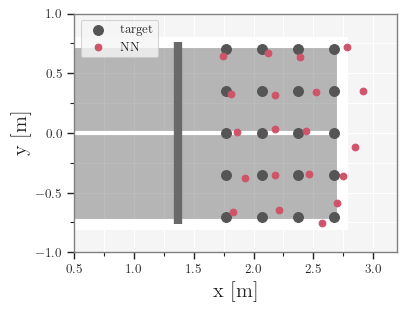

In [30]:
fig, ax = plt.subplots(figsize=(4, 3), layout="constrained")
add_table_2d(ax)

hitpoints = np.array(collection_hitpoints[0])

ax.scatter(
    targets[:, 0],
    targets[:, 1],
    color="#555555",
    # alpha=0.5,
    s=50,
    label="target",
    edgecolors=None,
)

ax.scatter(
    hitpoints[:, 0],
    hitpoints[:, 1],
    color="#CF5369",
    label="NN",
)

xloc = MultipleLocator(base=0.5)
yloc = MultipleLocator(base=0.5)
ax.xaxis.set_major_locator(xloc)
ax.yaxis.set_major_locator(yloc)

x_minor_locator = AutoMinorLocator(2)
y_minor_locator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(x_minor_locator)
ax.yaxis.set_minor_locator(y_minor_locator)

ax.set_xlim((0.5, 3.2))
ax.set_ylim((-1.00, 1.00))

ax.set_ylabel("y [m]", fontsize=15)
ax.set_xlabel("x [m]", fontsize=15)

ax.legend()
ax.set(aspect="equal")
ax.grid()

ax.grid(which="minor", color="white")
# ax.minorticks_on()

fig.savefig("plots/target_shooting.pdf")